In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [47]:
df2 = pd.read_csv('Titanic-Dataset.csv')

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Pclass', ylabel='Fare'>

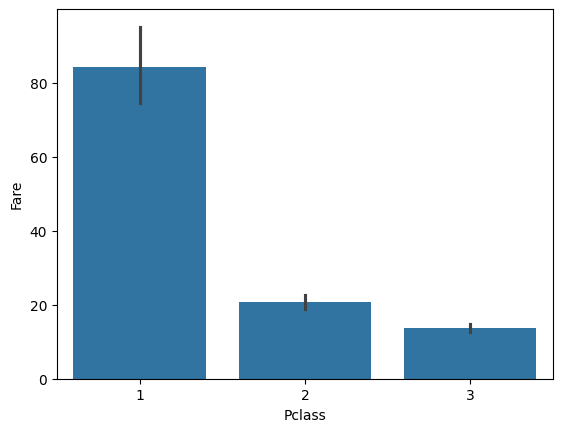

In [62]:
sns.barplot(df2,x='Pclass',y='Fare')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df = df[['Survived','Pclass','Sex','Age','SibSp','Embarked','Fare']]


In [15]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [40]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Embarked      2
Fare          0
dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(df[['Pclass','Sex','Age','Embarked','Fare']],df[['Survived']],test_size=0.2,random_state=0)

In [26]:
x_train

,Pclass,Sex,Age,Embarked,Fare
140,3,female,NaN,C,15.2458
439,2,male,31.0,S,10.5000
817,2,male,31.0,C,37.0042
378,3,male,20.0,C,4.0125
491,3,male,21.0,S,7.2500
...,...,...,...,...,...
835,1,female,39.0,C,83.1583
192,3,female,19.0,S,7.8542
629,3,male,NaN,Q,7.7333
559,3,female,36.0,S,17.4000


In [42]:
si = SimpleImputer()
x_train_age = si.fit_transform(x_train[['Age']])
x_test_age = si.fit_transform(x_test[['Age']])

x_train_age.shape

(712, 1)

In [ ]:
x_train[['Age']]

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()
oe.fit_trasform(x_train[['Pclass']],['1','2','3'])

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
x_train_sex_Emb = ohe.fit_transform(x_train[['Sex','Embarked']])
x_test_sex_Emb = ohe.fit_transform(x_test[['Sex','Embarked']])

x_train_sex_Emb.shape

(712, 4)

In [77]:
x_train_fare = x_train.drop(columns=['Age','Sex','Embarked']).values
x_test_fare = x_test.drop(columns=['Age','Sex','Embarked']).values
x_train_fare.shape

(712, 2)

In [84]:
x_train_transformed = np.concatenate((x_train_age,x_train_fare,x_train_sex_Emb),axis=1)
x_test_transformed = np.concatenate((x_test_age,x_test_fare,x_test_sex_Emb),axis=1)
x_train_transformed.shape

(712, 7)

In [86]:
from sklearn.compose import ColumnTransformer

In [89]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['Age']),
    ('tnf2',OneHotEncoder(drop='first',sparse_output=False),['Sex','Embarked'])
],remainder='passthrough')

In [91]:
transformer.fit_transform(x_train).shape

(712, 7)